In [4]:
import numpy as np
import limpy.lline as ll
import limpy.theory as lt
import limpy.utils as lu
import limpy.params as p
import limpy.powerspectra as lp
import matplotlib.pyplot as plt

from limpy.plotsettings import *
import matplotlib as mpl
import matplotlib.colors as colors
from matplotlib import gridspec

import torch
from sbi import utils as utils
from sbi import analysis as analysis
from sbi.inference.base import infer

In [5]:
import limpy.params as p
def configure_params_fisher(line_name="CII158", step_size=50):
    line_name=line_name
    step_size=step_size
    params_default=np.array(p.line_scattered_params(line_name))
    params_fisher_names=['a_off', 'b_off']      
    params_fisher={'a_off': params_default[0], 
                   'b_off':params_default[2]
                  }

    steps={'a_off': params_default[0]/step_size,
           'b_off':params_default[2]/step_size
          }
    return params_fisher, steps


params_fisher, steps= configure_params_fisher(line_name="CII158", step_size=50)
p
arams_default=params_fisher

In [57]:
num_dim = 2
prior = utils.BoxUniform(low= torch.tensor([4, 0.1]), high= torch.tensor([10, 2]))
bins=100

def simulator(parameter_set, bins=bins, z =5.8):
    small_h = 0.68
    #print("parameter set", parameter_set)
    parameter_set = parameter_set.numpy()
    a_off = parameter_set[0]
    b_off = parameter_set[1]
    
    print(a_off, b_off)
    params_fisher={'a_off': a_off, 
                   'b_off': b_off
                  }
    

    
    line_name='CII158'
    model_name="Alma_scalling"
    sfr_model="Behroozi19"
    mmin=1e10
    use_scatter=False
    halocat_file_type="input_cat"
    ngrid=512
    boxsize_x = 80 * small_h
    boxsize_y = 80 * small_h
    boxsize_z = 80 * small_h


    hf = "/Users/anirbanroy/Documents/LIM_data/Box80_new/halos_z5.80_512_80Mpc.npz"
      
    Igcal= ll.make_quantity_rectangular_grid_new(hf, 
                                           z,
                                           sfr_model=sfr_model,
                                           model_name= model_name,
                                           quantity='intensity', 
                                           line_name = line_name, 
                                           halo_cutoff_mass= mmin, 
                                           use_scatter=use_scatter,
                                           halocat_type=halocat_file_type,
                                           ngrid_x = ngrid, 
                                           ngrid_y = ngrid, 
                                           ngrid_z = ngrid,
                                           boxsize_x=boxsize_x,
                                           boxsize_y=boxsize_y,
                                           boxsize_z=boxsize_z,
                                           nu_obs = 280,
                                           dnu_obs = 2.8,
                                           theta_fwhm = 1,
                                           z_evolution = False,
                                           params_fisher= params_fisher)

    
    #Igcal[Igcal <= 0] = 1e-20 #[Igcal>=1]
    delta_f = Igcal [Igcal>1]
    delta_f = delta_f.flatten()
    range_pdf = [1e-1, 1e1]
    hist, bine = np.histogram(np.log10(delta_f), bins=bins, range = range_pdf, density = True)
    
    #hist, bine = np.histogram(np.log10(delta_f), bins=50, density = False)
    
    return torch.tensor(hist)
    

posterior = infer(simulator, prior, method="SNPE", num_simulations=200)

[7.5670824 1.8317983] [4.461997  1.4023803]
4.19781 1.6458603


Running 200 simulations.:   0%|                         | 0/200 [00:00<?, ?it/s]

9.430557 1.487789


Running 200 simulations.:   0%|                 | 1/200 [00:00<00:50,  3.96it/s]

6.380111 0.47084358


Running 200 simulations.:   1%|▏                | 2/200 [00:00<00:50,  3.95it/s]

9.292965 1.2922318


Running 200 simulations.:   2%|▎                | 3/200 [00:00<00:52,  3.77it/s]

4.1153364 0.82337713


Running 200 simulations.:   2%|▎                | 4/200 [00:01<00:50,  3.85it/s]

9.140484 1.8760034


Running 200 simulations.:   2%|▍                | 5/200 [00:01<00:49,  3.95it/s]

4.2315526 0.41618618


Running 200 simulations.:   3%|▌                | 6/200 [00:01<00:48,  4.01it/s]

9.076703 0.3330014


Running 200 simulations.:   4%|▌                | 7/200 [00:01<00:47,  4.04it/s]

7.830716 0.19665515


Running 200 simulations.:   4%|▋                | 8/200 [00:02<00:47,  4.01it/s]

5.659174 0.28671038


Running 200 simulations.:   4%|▊                | 9/200 [00:02<00:48,  3.92it/s]

7.355434 0.66208225


Running 200 simulations.:   5%|▊               | 10/200 [00:02<00:49,  3.86it/s]

5.966887 0.13472843


Running 200 simulations.:   6%|▉               | 11/200 [00:02<00:49,  3.80it/s]

7.9523783 0.5013427


Running 200 simulations.:   6%|▉               | 12/200 [00:03<00:49,  3.82it/s]

8.650689 1.1167836


Running 200 simulations.:   6%|█               | 13/200 [00:03<00:49,  3.81it/s]

4.0091515 0.41217095


Running 200 simulations.:   7%|█               | 14/200 [00:03<00:48,  3.84it/s]

6.857044 0.48459446


Running 200 simulations.:   8%|█▏              | 15/200 [00:03<00:46,  3.94it/s]

4.4681044 0.97367984


Running 200 simulations.:   8%|█▎              | 16/200 [00:04<00:46,  3.94it/s]

7.712639 1.0322914


Running 200 simulations.:   8%|█▎              | 17/200 [00:04<00:46,  3.96it/s]

7.3864775 1.678438


Running 200 simulations.:   9%|█▍              | 18/200 [00:04<00:46,  3.92it/s]

7.868862 1.0533016


Running 200 simulations.:  10%|█▌              | 19/200 [00:04<00:46,  3.89it/s]

7.055051 0.5798466


Running 200 simulations.:  10%|█▌              | 20/200 [00:05<00:45,  3.93it/s]

6.5492506 0.4732388


Running 200 simulations.:  10%|█▋              | 21/200 [00:05<00:46,  3.87it/s]

7.8119054 1.956007


Running 200 simulations.:  11%|█▊              | 22/200 [00:05<00:46,  3.85it/s]

4.8756037 1.2698643


Running 200 simulations.:  12%|█▊              | 23/200 [00:05<00:45,  3.91it/s]

9.993472 0.12936746


Running 200 simulations.:  12%|█▉              | 24/200 [00:06<00:44,  3.95it/s]

6.6700377 0.34607804


Running 200 simulations.:  12%|██              | 25/200 [00:06<00:44,  3.95it/s]

9.460457 1.5510013


Running 200 simulations.:  13%|██              | 26/200 [00:06<00:44,  3.94it/s]

7.084731 1.3860929


Running 200 simulations.:  14%|██▏             | 27/200 [00:06<00:44,  3.91it/s]

4.3926005 1.3361297


Running 200 simulations.:  14%|██▏             | 28/200 [00:07<00:43,  3.93it/s]

5.0174937 1.8565822


Running 200 simulations.:  14%|██▎             | 29/200 [00:07<00:45,  3.79it/s]

7.9793253 1.1281345


Running 200 simulations.:  15%|██▍             | 30/200 [00:07<00:46,  3.68it/s]

6.045536 1.1163343


Running 200 simulations.:  16%|██▍             | 31/200 [00:08<00:46,  3.60it/s]

7.754852 0.20065466


Running 200 simulations.:  16%|██▌             | 32/200 [00:08<00:47,  3.51it/s]

9.277081 0.57923186


Running 200 simulations.:  16%|██▋             | 33/200 [00:08<00:47,  3.52it/s]

4.0621405 1.5573071


Running 200 simulations.:  17%|██▋             | 34/200 [00:08<00:46,  3.54it/s]

6.0855165 0.42435503


Running 200 simulations.:  18%|██▊             | 35/200 [00:09<00:46,  3.55it/s]

5.8134346 0.1526017


Running 200 simulations.:  18%|██▉             | 36/200 [00:09<00:46,  3.55it/s]

5.696612 0.6459213


Running 200 simulations.:  18%|██▉             | 37/200 [00:09<00:50,  3.23it/s]

7.9168563 1.7442768


Running 200 simulations.:  19%|███             | 38/200 [00:10<00:53,  3.04it/s]

8.179222 0.92080677


Running 200 simulations.:  20%|███             | 39/200 [00:10<00:49,  3.27it/s]

8.078182 1.6356987


Running 200 simulations.:  20%|███▏            | 40/200 [00:10<00:47,  3.34it/s]

7.552771 1.3714294


Running 200 simulations.:  20%|███▎            | 41/200 [00:11<00:46,  3.45it/s]

5.046071 0.814152


Running 200 simulations.:  21%|███▎            | 42/200 [00:11<00:45,  3.49it/s]

6.4679227 0.7845533


Running 200 simulations.:  22%|███▍            | 43/200 [00:11<00:46,  3.40it/s]

5.359934 0.5823452


Running 200 simulations.:  22%|███▌            | 44/200 [00:11<00:47,  3.29it/s]

8.854468 0.7737203


Running 200 simulations.:  22%|███▌            | 45/200 [00:12<00:52,  2.93it/s]

4.530238 0.36694604


Running 200 simulations.:  23%|███▋            | 46/200 [00:12<00:54,  2.84it/s]

4.9888377 1.1811037


Running 200 simulations.:  24%|███▊            | 47/200 [00:12<00:49,  3.08it/s]

9.612557 1.345834


Running 200 simulations.:  24%|███▊            | 48/200 [00:13<00:45,  3.32it/s]

6.239953 1.2594249


Running 200 simulations.:  24%|███▉            | 49/200 [00:13<00:42,  3.53it/s]

7.3020043 0.8553346


Running 200 simulations.:  25%|████            | 50/200 [00:13<00:40,  3.70it/s]

5.9292927 0.72398543


Running 200 simulations.:  26%|████            | 51/200 [00:13<00:39,  3.76it/s]

7.3483105 0.44659382


Running 200 simulations.:  26%|████▏           | 52/200 [00:14<00:38,  3.84it/s]

7.4615173 1.2175108


Running 200 simulations.:  26%|████▏           | 53/200 [00:14<00:37,  3.90it/s]

5.2673 0.34382063


Running 200 simulations.:  27%|████▎           | 54/200 [00:14<00:37,  3.88it/s]

6.8889885 1.404477


Running 200 simulations.:  28%|████▍           | 55/200 [00:14<00:37,  3.88it/s]

4.16888 1.9089749


Running 200 simulations.:  28%|████▍           | 56/200 [00:15<00:37,  3.88it/s]

5.766142 1.6289487


Running 200 simulations.:  28%|████▌           | 57/200 [00:15<00:38,  3.71it/s]

7.0515714 1.2591119


Running 200 simulations.:  29%|████▋           | 58/200 [00:15<00:37,  3.81it/s]

8.956648 0.24909288


Running 200 simulations.:  30%|████▋           | 59/200 [00:16<00:36,  3.89it/s]

6.4920473 1.9765866


Running 200 simulations.:  30%|████▊           | 60/200 [00:16<00:35,  3.92it/s]

7.7667766 1.9747281


Running 200 simulations.:  30%|████▉           | 61/200 [00:16<00:35,  3.97it/s]

5.735119 1.2126852


Running 200 simulations.:  31%|████▉           | 62/200 [00:16<00:34,  4.04it/s]

4.7052207 0.9679792


Running 200 simulations.:  32%|█████           | 63/200 [00:17<00:33,  4.03it/s]

4.9267116 0.949295


Running 200 simulations.:  32%|█████           | 64/200 [00:17<00:33,  4.03it/s]

7.7318707 0.12533149


Running 200 simulations.:  32%|█████▏          | 65/200 [00:17<00:33,  4.01it/s]

5.1407137 1.7818753


Running 200 simulations.:  33%|█████▎          | 66/200 [00:17<00:33,  4.03it/s]

6.181191 0.78547406


Running 200 simulations.:  34%|█████▎          | 67/200 [00:18<00:33,  3.98it/s]

5.859772 0.38376644


Running 200 simulations.:  34%|█████▍          | 68/200 [00:18<00:33,  3.99it/s]

5.44263 1.1829405


Running 200 simulations.:  34%|█████▌          | 69/200 [00:18<00:32,  4.01it/s]

7.959301 1.702079


Running 200 simulations.:  35%|█████▌          | 70/200 [00:18<00:31,  4.07it/s]

6.222698 1.7416972


Running 200 simulations.:  36%|█████▋          | 71/200 [00:18<00:31,  4.05it/s]

5.8025327 0.7072902


Running 200 simulations.:  36%|█████▊          | 72/200 [00:19<00:32,  3.99it/s]

6.6752086 0.4941495


Running 200 simulations.:  36%|█████▊          | 73/200 [00:19<00:31,  4.03it/s]

8.536328 0.542891


Running 200 simulations.:  37%|█████▉          | 74/200 [00:19<00:31,  4.02it/s]

6.6100864 1.3232268


Running 200 simulations.:  38%|██████          | 75/200 [00:20<00:31,  3.94it/s]

5.7533174 1.4705255


Running 200 simulations.:  38%|██████          | 76/200 [00:20<00:32,  3.82it/s]

6.1007214 1.4680666


Running 200 simulations.:  38%|██████▏         | 77/200 [00:20<00:32,  3.84it/s]

9.2769985 0.9643285


Running 200 simulations.:  39%|██████▏         | 78/200 [00:20<00:31,  3.91it/s]

5.453151 1.1368015


Running 200 simulations.:  40%|██████▎         | 79/200 [00:21<00:31,  3.89it/s]

8.859185 0.80988824


Running 200 simulations.:  40%|██████▍         | 80/200 [00:21<00:37,  3.23it/s]

9.274169 0.9066148


Running 200 simulations.:  40%|██████▍         | 81/200 [00:21<00:35,  3.34it/s]

9.0994425 0.8084369


Running 200 simulations.:  41%|██████▌         | 82/200 [00:22<00:35,  3.29it/s]

6.2148085 0.8253045


Running 200 simulations.:  42%|██████▋         | 83/200 [00:22<00:38,  3.02it/s]

8.346367 0.6853496


Running 200 simulations.:  42%|██████▋         | 84/200 [00:22<00:36,  3.14it/s]

9.33036 0.44893944


Running 200 simulations.:  42%|██████▊         | 85/200 [00:23<00:36,  3.18it/s]

6.773157 1.3139498


Running 200 simulations.:  43%|██████▉         | 86/200 [00:23<00:38,  2.97it/s]

8.212467 0.44626528


Running 200 simulations.:  44%|██████▉         | 87/200 [00:23<00:35,  3.19it/s]

5.937225 1.1455704


Running 200 simulations.:  44%|███████         | 88/200 [00:23<00:32,  3.41it/s]

7.076005 1.8887662


Running 200 simulations.:  44%|███████         | 89/200 [00:24<00:31,  3.54it/s]

8.136763 1.9318075


Running 200 simulations.:  45%|███████▏        | 90/200 [00:24<00:31,  3.53it/s]

8.97451 0.4882157


Running 200 simulations.:  46%|███████▎        | 91/200 [00:24<00:30,  3.53it/s]

9.372728 0.89412606


Running 200 simulations.:  46%|███████▎        | 92/200 [00:25<00:29,  3.65it/s]

8.918663 1.4636621


Running 200 simulations.:  46%|███████▍        | 93/200 [00:25<00:28,  3.70it/s]

4.838604 1.6509842


Running 200 simulations.:  47%|███████▌        | 94/200 [00:25<00:29,  3.61it/s]

4.7679386 0.8096792


Running 200 simulations.:  48%|███████▌        | 95/200 [00:25<00:29,  3.57it/s]

9.0163 0.70104915


Running 200 simulations.:  48%|███████▋        | 96/200 [00:26<00:28,  3.66it/s]

5.789753 0.55763185


Running 200 simulations.:  48%|███████▊        | 97/200 [00:26<00:28,  3.56it/s]

9.142246 0.21088952


Running 200 simulations.:  49%|███████▊        | 98/200 [00:26<00:28,  3.62it/s]

6.813855 0.25110927


Running 200 simulations.:  50%|███████▉        | 99/200 [00:26<00:27,  3.67it/s]

7.6242023 1.5275413


Running 200 simulations.:  50%|███████▌       | 100/200 [00:27<00:26,  3.75it/s]

8.184811 1.1966279


Running 200 simulations.:  50%|███████▌       | 101/200 [00:27<00:25,  3.81it/s]

6.716422 0.5738374


Running 200 simulations.:  51%|███████▋       | 102/200 [00:27<00:25,  3.90it/s]

9.577228 1.1076959


Running 200 simulations.:  52%|███████▋       | 103/200 [00:27<00:24,  3.96it/s]

8.998763 1.3868495


Running 200 simulations.:  52%|███████▊       | 104/200 [00:28<00:25,  3.82it/s]

6.535031 1.9946423


Running 200 simulations.:  52%|███████▉       | 105/200 [00:28<00:24,  3.84it/s]

5.5879936 1.6746278


Running 200 simulations.:  53%|███████▉       | 106/200 [00:28<00:24,  3.91it/s]

7.3043056 1.4383476


Running 200 simulations.:  54%|████████       | 107/200 [00:28<00:23,  3.94it/s]

4.7827816 1.2815727


Running 200 simulations.:  54%|████████       | 108/200 [00:29<00:23,  3.96it/s]

6.676592 0.3891042


Running 200 simulations.:  55%|████████▏      | 109/200 [00:29<00:23,  3.94it/s]

7.941169 0.796824


Running 200 simulations.:  55%|████████▎      | 110/200 [00:29<00:22,  3.97it/s]

8.429882 0.5870304


Running 200 simulations.:  56%|████████▎      | 111/200 [00:29<00:22,  4.00it/s]

7.606944 1.2790266


Running 200 simulations.:  56%|████████▍      | 112/200 [00:30<00:21,  4.00it/s]

5.386209 1.5012375


Running 200 simulations.:  56%|████████▍      | 113/200 [00:30<00:22,  3.93it/s]

7.3732653 1.077586


Running 200 simulations.:  57%|████████▌      | 114/200 [00:30<00:22,  3.84it/s]

8.669512 0.38580492


Running 200 simulations.:  57%|████████▋      | 115/200 [00:31<00:23,  3.70it/s]

6.786409 1.961784


Running 200 simulations.:  58%|████████▋      | 116/200 [00:31<00:23,  3.65it/s]

6.1182394 1.1860671


Running 200 simulations.:  58%|████████▊      | 117/200 [00:31<00:22,  3.69it/s]

4.3298597 1.7180632


Running 200 simulations.:  59%|████████▊      | 118/200 [00:31<00:23,  3.53it/s]

5.259517 1.4341211


Running 200 simulations.:  60%|████████▉      | 119/200 [00:32<00:23,  3.50it/s]

8.422902 0.7237436


Running 200 simulations.:  60%|█████████      | 120/200 [00:32<00:22,  3.59it/s]

4.7955866 1.3579954


Running 200 simulations.:  60%|█████████      | 121/200 [00:32<00:21,  3.67it/s]

6.8985953 0.9652908


Running 200 simulations.:  61%|█████████▏     | 122/200 [00:32<00:20,  3.75it/s]

8.6215725 1.165686


Running 200 simulations.:  62%|█████████▏     | 123/200 [00:33<00:20,  3.83it/s]

5.588253 1.5034978


Running 200 simulations.:  62%|█████████▎     | 124/200 [00:33<00:19,  3.85it/s]

4.0926914 1.0214545


Running 200 simulations.:  62%|█████████▍     | 125/200 [00:33<00:18,  3.98it/s]

5.1631703 0.43787298


Running 200 simulations.:  63%|█████████▍     | 126/200 [00:33<00:18,  4.07it/s]

7.5641713 1.4713633


Running 200 simulations.:  64%|█████████▌     | 127/200 [00:34<00:19,  3.82it/s]

7.530661 1.3965718


Running 200 simulations.:  64%|█████████▌     | 128/200 [00:34<00:18,  3.82it/s]

4.634139 1.7514691


Running 200 simulations.:  64%|█████████▋     | 129/200 [00:34<00:18,  3.88it/s]

8.508565 0.12967946


Running 200 simulations.:  65%|█████████▊     | 130/200 [00:35<00:17,  3.93it/s]

5.6613426 1.9513483


Running 200 simulations.:  66%|█████████▊     | 131/200 [00:35<00:17,  3.93it/s]

6.3982844 1.651018


Running 200 simulations.:  66%|█████████▉     | 132/200 [00:35<00:17,  3.84it/s]

4.7108746 0.5284405


Running 200 simulations.:  66%|█████████▉     | 133/200 [00:35<00:17,  3.87it/s]

5.5559783 1.8962114


Running 200 simulations.:  67%|██████████     | 134/200 [00:36<00:16,  3.91it/s]

6.9555187 1.2456529


Running 200 simulations.:  68%|██████████▏    | 135/200 [00:36<00:16,  3.92it/s]

5.2742004 1.052704


Running 200 simulations.:  68%|██████████▏    | 136/200 [00:36<00:16,  3.94it/s]

5.450608 1.9034688


Running 200 simulations.:  68%|██████████▎    | 137/200 [00:36<00:15,  4.00it/s]

7.5247808 1.8317649


Running 200 simulations.:  69%|██████████▎    | 138/200 [00:37<00:15,  3.99it/s]

6.151285 1.538823


Running 200 simulations.:  70%|██████████▍    | 139/200 [00:37<00:15,  3.94it/s]

6.667723 1.4214224


Running 200 simulations.:  70%|██████████▌    | 140/200 [00:37<00:15,  3.79it/s]

9.359821 1.8333977


Running 200 simulations.:  70%|██████████▌    | 141/200 [00:37<00:16,  3.62it/s]

9.93597 1.6353093


Running 200 simulations.:  71%|██████████▋    | 142/200 [00:38<00:15,  3.74it/s]

7.5981035 1.3247962


Running 200 simulations.:  72%|██████████▋    | 143/200 [00:38<00:15,  3.78it/s]

4.0265737 0.47408068


Running 200 simulations.:  72%|██████████▊    | 144/200 [00:38<00:14,  3.88it/s]

9.751568 0.6090434


Running 200 simulations.:  72%|██████████▉    | 145/200 [00:38<00:13,  4.05it/s]

6.593735 1.6589767


Running 200 simulations.:  73%|██████████▉    | 146/200 [00:39<00:13,  4.05it/s]

7.0935364 1.5728089


Running 200 simulations.:  74%|███████████    | 147/200 [00:39<00:13,  4.01it/s]

8.515206 0.5778185


Running 200 simulations.:  74%|███████████    | 148/200 [00:39<00:13,  3.95it/s]

8.9509 0.76869595


Running 200 simulations.:  74%|███████████▏   | 149/200 [00:39<00:13,  3.90it/s]

4.891412 1.6521046


Running 200 simulations.:  75%|███████████▎   | 150/200 [00:40<00:13,  3.65it/s]

9.530768 1.2079043


Running 200 simulations.:  76%|███████████▎   | 151/200 [00:40<00:13,  3.59it/s]

9.2993965 1.9590898


Running 200 simulations.:  76%|███████████▍   | 152/200 [00:40<00:13,  3.61it/s]

9.776888 0.34688708


Running 200 simulations.:  76%|███████████▍   | 153/200 [00:41<00:12,  3.73it/s]

9.415588 1.899855


Running 200 simulations.:  77%|███████████▌   | 154/200 [00:41<00:12,  3.76it/s]

9.0 1.9484777


Running 200 simulations.:  78%|███████████▋   | 155/200 [00:41<00:11,  3.75it/s]

9.963319 0.90427583


Running 200 simulations.:  78%|███████████▋   | 156/200 [00:41<00:11,  3.71it/s]

5.5672398 0.6810955


Running 200 simulations.:  78%|███████████▊   | 157/200 [00:42<00:11,  3.62it/s]

9.868714 0.606484


Running 200 simulations.:  79%|███████████▊   | 158/200 [00:42<00:11,  3.60it/s]

5.605487 0.39112172


Running 200 simulations.:  80%|███████████▉   | 159/200 [00:42<00:11,  3.62it/s]

4.424341 1.8400832


Running 200 simulations.:  80%|████████████   | 160/200 [00:42<00:11,  3.56it/s]

8.539584 0.40343356


Running 200 simulations.:  80%|████████████   | 161/200 [00:43<00:15,  2.53it/s]

8.50837 0.6137489


Running 200 simulations.:  81%|████████████▏  | 162/200 [00:43<00:13,  2.84it/s]

6.883234 1.9231483


Running 200 simulations.:  82%|████████████▏  | 163/200 [00:44<00:12,  3.04it/s]

4.5569506 0.39120847


Running 200 simulations.:  82%|████████████▎  | 164/200 [00:44<00:11,  3.26it/s]

9.453174 1.5766141


Running 200 simulations.:  82%|████████████▍  | 165/200 [00:44<00:10,  3.38it/s]

7.539899 1.094546


Running 200 simulations.:  83%|████████████▍  | 166/200 [00:44<00:09,  3.51it/s]

7.598037 0.35943028


Running 200 simulations.:  84%|████████████▌  | 167/200 [00:45<00:10,  3.15it/s]

8.851449 1.7922355


Running 200 simulations.:  84%|████████████▌  | 168/200 [00:45<00:10,  3.19it/s]

6.381084 0.4971241


Running 200 simulations.:  84%|████████████▋  | 169/200 [00:45<00:09,  3.38it/s]

4.9617987 1.2125381


Running 200 simulations.:  85%|████████████▊  | 170/200 [00:46<00:08,  3.53it/s]

4.097983 0.45937848


Running 200 simulations.:  86%|████████████▊  | 171/200 [00:46<00:08,  3.61it/s]

4.4498305 0.74784255


Running 200 simulations.:  86%|████████████▉  | 172/200 [00:46<00:07,  3.84it/s]

4.966387 1.3298179


Running 200 simulations.:  86%|████████████▉  | 173/200 [00:46<00:06,  3.94it/s]

9.065506 1.6890144


Running 200 simulations.:  87%|█████████████  | 174/200 [00:47<00:06,  3.94it/s]

4.3457127 1.1272993


Running 200 simulations.:  88%|█████████████▏ | 175/200 [00:47<00:06,  3.96it/s]

9.625107 0.6141794


Running 200 simulations.:  88%|█████████████▏ | 176/200 [00:47<00:06,  3.73it/s]

9.530884 1.0082316


Running 200 simulations.:  88%|█████████████▎ | 177/200 [00:47<00:06,  3.72it/s]

4.6502004 0.5862632


Running 200 simulations.:  89%|█████████████▎ | 178/200 [00:48<00:06,  3.50it/s]

5.759811 0.5061545


Running 200 simulations.:  90%|█████████████▍ | 179/200 [00:48<00:05,  3.63it/s]

8.602514 0.857151


Running 200 simulations.:  90%|█████████████▌ | 180/200 [00:48<00:05,  3.76it/s]

9.055853 0.8465947


Running 200 simulations.:  90%|█████████████▌ | 181/200 [00:49<00:04,  3.85it/s]

9.553698 0.75452954


Running 200 simulations.:  91%|█████████████▋ | 182/200 [00:49<00:04,  3.90it/s]

9.308294 0.14381042


Running 200 simulations.:  92%|█████████████▋ | 183/200 [00:49<00:04,  3.92it/s]

6.7430353 1.9056448


Running 200 simulations.:  92%|█████████████▊ | 184/200 [00:49<00:04,  3.94it/s]

9.439388 1.9775394


Running 200 simulations.:  92%|█████████████▉ | 185/200 [00:50<00:03,  3.98it/s]

9.348557 1.5502596


Running 200 simulations.:  93%|█████████████▉ | 186/200 [00:50<00:03,  3.95it/s]

6.638366 1.927248


Running 200 simulations.:  94%|██████████████ | 187/200 [00:50<00:03,  3.92it/s]

6.013542 1.3880984


Running 200 simulations.:  94%|██████████████ | 188/200 [00:50<00:03,  3.95it/s]

6.303555 1.3312597


Running 200 simulations.:  94%|██████████████▏| 189/200 [00:51<00:02,  3.91it/s]

8.86602 0.5686678


Running 200 simulations.:  95%|██████████████▎| 190/200 [00:51<00:02,  3.93it/s]

6.2247767 0.14961115


Running 200 simulations.:  96%|██████████████▎| 191/200 [00:51<00:02,  3.93it/s]

5.222682 1.9024669


Running 200 simulations.:  96%|██████████████▍| 192/200 [00:51<00:02,  3.97it/s]

5.4569235 1.4182688


Running 200 simulations.:  96%|██████████████▍| 193/200 [00:52<00:01,  4.00it/s]

4.426002 0.59077185


Running 200 simulations.:  97%|██████████████▌| 194/200 [00:52<00:01,  3.94it/s]

4.7439375 1.6825534


Running 200 simulations.:  98%|██████████████▋| 195/200 [00:52<00:01,  3.89it/s]

5.2299957 1.9244787


Running 200 simulations.:  98%|██████████████▋| 196/200 [00:52<00:01,  3.90it/s]

4.994739 0.6106144


Running 200 simulations.:  98%|██████████████▊| 197/200 [00:53<00:00,  3.86it/s]

4.632041 1.3752766


Running 200 simulations.:  99%|██████████████▊| 198/200 [00:53<00:00,  3.86it/s]

7.8207264 0.89980614


Running 200 simulations.: 100%|██████████████▉| 199/200 [00:53<00:00,  3.74it/s]

4.3784094 1.7736944


Running 200 simulations.: 100%|███████████████| 200/200 [00:53<00:00,  3.71it/s]


 Neural network successfully converged after 53 epochs.

In [58]:
observation = simulator(torch.tensor([6.5, 0.59]), z =5.8)

6.5 0.59


In [59]:
samples = posterior.sample((100000,), x=observation)

Drawing 100000 posterior samples: 102108it [00:01, 76538.14it/s]                


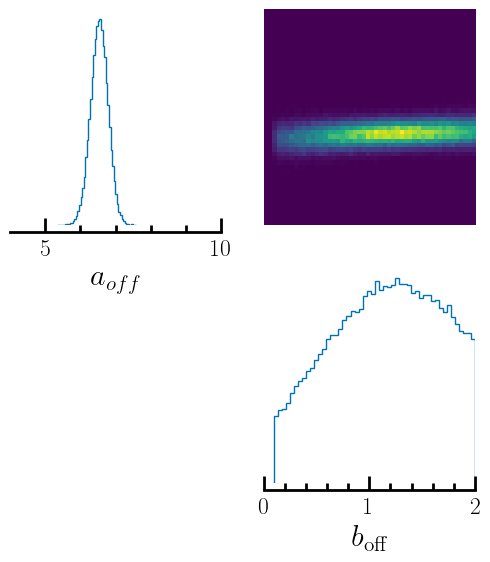

In [60]:
log_probability = posterior.log_prob(samples, x=observation)
_ = analysis.pairplot(samples, limits=[[4, 10], [0., 2.0]],
                      labels=[r'$a_{off}$', r'$b_{\rm off}$'], figsize=(6, 6))

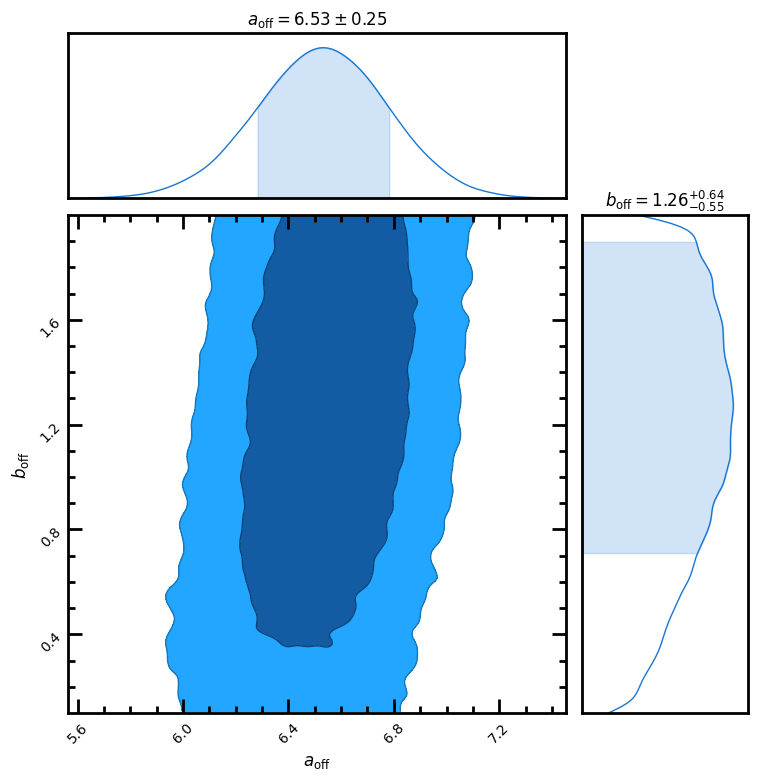

In [61]:
import numpy as np
from chainconsumer import ChainConsumer

np.random.seed(0)
data = samples.numpy()

c = ChainConsumer()
c.add_chain(data, parameters=[r"$a_{\rm off}$", r"$b_{\rm off}$"])
fig = c.plotter.plot(figsize="column", truth=[0.0, 4.0])

# If we wanted to save to file, we would instead have written
# fig = c.plotter.plot(filename="location", figsize="column", truth=[0.0, 4.0])

# If we wanted to display the plot interactively...
# fig = c.plotter.plot(display=True, figsize="column", truth=[0.0, 4.0])

fig.set_size_inches(3 + fig.get_size_inches())  # Resize fig for doco. You don't need this.

In [62]:
def make_grid_rectangular(
    grid,
    halo_redshift,
    ngrid_x=None,
    ngrid_y=None,
    ngrid_z=None,
    boxsize_x=None,
    boxsize_y=None,
    boxsize_z=None,
    nu_obs = None,
    dnu_obs =None,
):
    if (dnu_obs is not None):
        zem, dz, dchi, d_ngrid = lu.box_freq_to_quantities(nu_obs=nu_obs, 
                                                           dnu_obs=dnu_obs, 
                                                           boxsize= boxsize_z,
                                                           ngrid= ngrid_z,
                                                           z_start = halo_redshift,
                                                           line_name= "CII158")
        
        Ngrid_new = int(ngrid_z/d_ngrid) if d_ngrid < ngrid_z else 1
        d_ngrid = d_ngrid if d_ngrid< ngrid_z else ngrid_z
    
    # if dnu_obs is None, then ngrid along z axis will remain unchanged. 
    if (dnu_obs is None):
        Ngrid_new = ngrid_z
        d_ngrid = ngrid_z
    

    grid_final = np.empty((ngrid_x, ngrid_y))
    
    grid_final = np.array([])
    for i in range(Ngrid_new):
        print(i)
        start = i * d_ngrid
        end = (i + 1) * d_ngrid
        noise_cal = np.sum(grid[:, :, start: end], axis = 2)
        if i ==0:
            grid_final = noise_cal
        if i>0:
            grid_final = np.dstack([grid_final,noise_cal])
       
    
    return grid_final.reshape(ngrid_x, ngrid_y, Ngrid_new)

In [63]:
small_h =0.68
noise_grid = np.load("/Users/anirbanroy/Documents/Lim-cross-correlation/codes/Noise_grid_220.npz")['grid']
boxsize_x = 80 * small_h
boxsize_y = 80 * small_h
boxsize_z = 80 * small_h



Ignoise = make_grid_rectangular(noise_grid, 5.8,
                           ngrid_x= 512,
                            ngrid_y= 512,
                            ngrid_z= 512,
                            boxsize_x= boxsize_x,
                            boxsize_y= boxsize_y,
                            boxsize_z= boxsize_z,
                            nu_obs = 280,
                            dnu_obs = 2.8)
                           

0


In [64]:
np.shape(np.sum(noise_grid[:, :, 0:50], axis=2))

(512, 512)

In [65]:
num_dim = 2
prior = utils.BoxUniform(low= torch.tensor([4, 0.1]), high= torch.tensor([10, 2]))
bins=40

#noise_grid = np.load("/Users/anirbanroy/Documents/Lim-cross-correlation/codes/Noise_grid_220.npz")['grid']



def simulator1(parameter_set, noise=True, bins=bins, z =5.8):
    small_h = 0.68
    #print("parameter set", parameter_set)
    parameter_set = parameter_set.numpy()
    a_off = parameter_set[0]
    b_off = parameter_set[1]
    
    print(a_off, b_off)
    params_fisher={'a_off': a_off, 
                   'b_off': b_off
                  }
    

    
    line_name='CII158'
    model_name="Alma_scalling"
    sfr_model="Behroozi19"
    mmin=1e10
    use_scatter=False
    halocat_file_type="input_cat"
    ngrid=512
    boxsize_x = 80 * small_h
    boxsize_y = 80 * small_h
    boxsize_z = 80 * small_h


    hf = "/Users/anirbanroy/Documents/LIM_data/Box80_new/halos_z5.80_512_80Mpc.npz"
      
    Igcal= ll.make_quantity_rectangular_grid_new(hf, 
                                           z,
                                           sfr_model=sfr_model,
                                           model_name= model_name,
                                           quantity='intensity', 
                                           line_name = line_name, 
                                           halo_cutoff_mass= mmin, 
                                           use_scatter=use_scatter,
                                           halocat_type=halocat_file_type,
                                           ngrid_x = ngrid, 
                                           ngrid_y = ngrid, 
                                           ngrid_z = ngrid,
                                           boxsize_x=boxsize_x,
                                           boxsize_y=boxsize_y,
                                           boxsize_z=boxsize_z,
                                           nu_obs = 280,
                                           dnu_obs = 2.8,
                                           theta_fwhm = 1,
                                           z_evolution = False,
                                           params_fisher= params_fisher)

    
    #Igcal[Igcal <= 0] = 1e-20 #[Igcal>=1]
    if noise:
        print("Adding noise")
        Igcal += Ignoise
        
    delta_f = Igcal [Igcal>1]
    delta_f = delta_f.flatten()
    range_pdf = [1e-1, 1e1]
    hist, bine = np.histogram(np.log10(delta_f), bins=bins, range = range_pdf, density = True)
    
    #hist, bine = np.histogram(np.log10(delta_f), bins=50, density = False)
    
    return torch.tensor(hist)
    

posterior1 = infer(simulator1, prior, method="SNPE", num_simulations=200)

[9.654117   0.14635818] [5.8330474 1.3738583]
4.6598387 1.7302061
Adding noise


Running 200 simulations.:   0%|                         | 0/200 [00:00<?, ?it/s]

4.288937 1.2678518


Running 200 simulations.:   0%|                 | 1/200 [00:00<00:49,  3.98it/s]

Adding noise
6.540129 1.0267961


Running 200 simulations.:   1%|▏                | 2/200 [00:00<00:51,  3.85it/s]

Adding noise
5.6357117 1.96326


Running 200 simulations.:   2%|▎                | 3/200 [00:00<00:51,  3.85it/s]

Adding noise
9.247607 0.8526559


Running 200 simulations.:   2%|▎                | 4/200 [00:01<00:50,  3.88it/s]

Adding noise
7.2281547 0.8594098


Running 200 simulations.:   2%|▍                | 5/200 [00:01<00:50,  3.90it/s]

Adding noise
5.253956 1.5840917


Running 200 simulations.:   3%|▌                | 6/200 [00:01<00:49,  3.90it/s]

Adding noise
5.8546796 1.1666842


Running 200 simulations.:   4%|▌                | 7/200 [00:01<00:50,  3.84it/s]

Adding noise
6.4442472 1.8923656


Running 200 simulations.:   4%|▋                | 8/200 [00:02<00:49,  3.89it/s]

Adding noise
4.3034725 1.4204409


Running 200 simulations.:   4%|▊                | 9/200 [00:02<00:49,  3.86it/s]

Adding noise
6.297529 1.1213148


Running 200 simulations.:   5%|▊               | 10/200 [00:02<00:49,  3.81it/s]

Adding noise
5.9441776 0.7455085


Running 200 simulations.:   6%|▉               | 11/200 [00:02<00:49,  3.80it/s]

Adding noise
5.814853 1.6930279


Running 200 simulations.:   6%|▉               | 12/200 [00:03<00:49,  3.77it/s]

Adding noise
8.874208 1.9487326


Running 200 simulations.:   6%|█               | 13/200 [00:03<00:48,  3.82it/s]

Adding noise
8.582797 0.13746384


Running 200 simulations.:   7%|█               | 14/200 [00:03<00:47,  3.88it/s]

Adding noise
6.829874 0.8193645


Running 200 simulations.:   8%|█▏              | 15/200 [00:03<00:47,  3.89it/s]

Adding noise
5.1370354 0.73537904


Running 200 simulations.:   8%|█▎              | 16/200 [00:04<00:48,  3.82it/s]

Adding noise
7.22491 0.6567724


Running 200 simulations.:   8%|█▎              | 17/200 [00:04<00:46,  3.90it/s]

Adding noise
7.3282776 0.7126777


Running 200 simulations.:   9%|█▍              | 18/200 [00:04<00:46,  3.95it/s]

Adding noise
6.068201 0.5746161


Running 200 simulations.:  10%|█▌              | 19/200 [00:04<00:45,  3.95it/s]

Adding noise
6.616024 0.6579907


Running 200 simulations.:  10%|█▌              | 20/200 [00:05<00:45,  3.94it/s]

Adding noise
9.677066 1.4947546


Running 200 simulations.:  10%|█▋              | 21/200 [00:05<00:47,  3.74it/s]

Adding noise
9.780068 0.7730801


Running 200 simulations.:  11%|█▊              | 22/200 [00:05<00:47,  3.78it/s]

Adding noise
6.981562 1.1632394


Running 200 simulations.:  12%|█▊              | 23/200 [00:05<00:47,  3.72it/s]

Adding noise
7.167465 1.2735038


Running 200 simulations.:  12%|█▉              | 24/200 [00:06<00:47,  3.67it/s]

Adding noise
6.512272 1.6291136


Running 200 simulations.:  12%|██              | 25/200 [00:06<00:52,  3.31it/s]

Adding noise
6.6078897 0.9156167


Running 200 simulations.:  13%|██              | 26/200 [00:06<00:53,  3.27it/s]

Adding noise
9.145937 0.25357717


Running 200 simulations.:  14%|██▏             | 27/200 [00:07<00:50,  3.40it/s]

Adding noise
8.300841 1.066951


Running 200 simulations.:  14%|██▏             | 28/200 [00:07<00:49,  3.50it/s]

Adding noise
6.305268 1.6698091


Running 200 simulations.:  14%|██▎             | 29/200 [00:07<00:47,  3.63it/s]

Adding noise
6.091606 1.303404


Running 200 simulations.:  15%|██▍             | 30/200 [00:08<00:46,  3.68it/s]

Adding noise
8.795757 0.71802866


Running 200 simulations.:  16%|██▍             | 31/200 [00:08<00:45,  3.70it/s]

Adding noise
5.8781238 0.12040098


Running 200 simulations.:  16%|██▌             | 32/200 [00:08<00:44,  3.76it/s]

Adding noise
4.2058077 0.79964095


Running 200 simulations.:  16%|██▋             | 33/200 [00:08<00:43,  3.80it/s]

Adding noise
4.624966 1.6009579


Running 200 simulations.:  17%|██▋             | 34/200 [00:09<00:43,  3.84it/s]

Adding noise
7.4651546 0.20522673


Running 200 simulations.:  18%|██▊             | 35/200 [00:09<00:42,  3.84it/s]

Adding noise
5.796193 1.7037152


Running 200 simulations.:  18%|██▉             | 36/200 [00:09<00:42,  3.89it/s]

Adding noise
9.685002 1.8133076


Running 200 simulations.:  18%|██▉             | 37/200 [00:09<00:41,  3.92it/s]

Adding noise
8.130943 0.59089166


Running 200 simulations.:  19%|███             | 38/200 [00:10<00:41,  3.90it/s]

Adding noise
5.807419 0.5581585


Running 200 simulations.:  20%|███             | 39/200 [00:10<00:41,  3.89it/s]

Adding noise
4.4691377 1.1772485


Running 200 simulations.:  20%|███▏            | 40/200 [00:10<00:41,  3.88it/s]

Adding noise
6.7924337 1.6213273


Running 200 simulations.:  20%|███▎            | 41/200 [00:10<00:40,  3.90it/s]

Adding noise
6.9485455 1.659197


Running 200 simulations.:  21%|███▎            | 42/200 [00:11<00:40,  3.89it/s]

Adding noise
7.938232 1.5083302


Running 200 simulations.:  22%|███▍            | 43/200 [00:11<00:40,  3.89it/s]

Adding noise
9.255457 1.6565855


Running 200 simulations.:  22%|███▌            | 44/200 [00:11<00:41,  3.72it/s]

Adding noise
6.6275063 1.4127791


Running 200 simulations.:  22%|███▌            | 45/200 [00:11<00:40,  3.81it/s]

Adding noise
7.7011523 1.2393136


Running 200 simulations.:  23%|███▋            | 46/200 [00:12<00:41,  3.74it/s]

Adding noise
5.0804434 0.20516253


Running 200 simulations.:  24%|███▊            | 47/200 [00:12<00:41,  3.71it/s]

Adding noise
6.4232564 0.17091958


Running 200 simulations.:  24%|███▊            | 48/200 [00:12<00:39,  3.83it/s]

Adding noise
6.33919 1.3686826


Running 200 simulations.:  24%|███▉            | 49/200 [00:12<00:38,  3.90it/s]

Adding noise
4.01979 0.97541267


Running 200 simulations.:  25%|████            | 50/200 [00:13<00:41,  3.58it/s]

Adding noise
4.4969583 0.96110046


Running 200 simulations.:  26%|████            | 51/200 [00:13<00:42,  3.50it/s]

Adding noise
6.360327 1.8189855


Running 200 simulations.:  26%|████▏           | 52/200 [00:13<00:42,  3.45it/s]

Adding noise
6.092374 1.1765468


Running 200 simulations.:  26%|████▏           | 53/200 [00:14<00:48,  3.03it/s]

Adding noise
4.141759 1.0721163


Running 200 simulations.:  27%|████▎           | 54/200 [00:14<00:48,  3.04it/s]

Adding noise
6.2755513 0.8096457


Running 200 simulations.:  28%|████▍           | 55/200 [00:14<00:45,  3.22it/s]

Adding noise
6.67375 1.0105416


Running 200 simulations.:  28%|████▍           | 56/200 [00:15<00:42,  3.42it/s]

Adding noise
5.783806 1.6012


Running 200 simulations.:  28%|████▌           | 57/200 [00:15<00:39,  3.59it/s]

Adding noise
4.0843678 1.5436709


Running 200 simulations.:  29%|████▋           | 58/200 [00:15<00:38,  3.73it/s]

Adding noise
6.580663 0.88399106


Running 200 simulations.:  30%|████▋           | 59/200 [00:15<00:37,  3.72it/s]

Adding noise
4.754646 0.20306447


Running 200 simulations.:  30%|████▊           | 60/200 [00:16<00:36,  3.79it/s]

Adding noise
5.9244504 1.319816


Running 200 simulations.:  30%|████▉           | 61/200 [00:16<00:35,  3.87it/s]

Adding noise
6.277708 1.0112915


Running 200 simulations.:  31%|████▉           | 62/200 [00:16<00:35,  3.92it/s]

Adding noise
9.286191 0.9773432


Running 200 simulations.:  32%|█████           | 63/200 [00:16<00:36,  3.76it/s]

Adding noise
8.392886 0.34337342


Running 200 simulations.:  32%|█████           | 64/200 [00:17<00:35,  3.83it/s]

Adding noise
5.9691205 0.76531863


Running 200 simulations.:  32%|█████▏          | 65/200 [00:17<00:35,  3.79it/s]

Adding noise
7.597136 1.7789488


Running 200 simulations.:  33%|█████▎          | 66/200 [00:17<00:35,  3.77it/s]

Adding noise
8.27179 1.082745


Running 200 simulations.:  34%|█████▎          | 67/200 [00:17<00:35,  3.74it/s]

Adding noise
8.835442 0.9202009


Running 200 simulations.:  34%|█████▍          | 68/200 [00:18<00:34,  3.84it/s]

Adding noise
4.9279656 0.92948526


Running 200 simulations.:  34%|█████▌          | 69/200 [00:18<00:33,  3.89it/s]

Adding noise
4.677663 1.3938435


Running 200 simulations.:  35%|█████▌          | 70/200 [00:18<00:34,  3.80it/s]

Adding noise
5.1110945 1.5877761


Running 200 simulations.:  36%|█████▋          | 71/200 [00:19<00:35,  3.66it/s]

Adding noise
4.006731 0.11728132


Running 200 simulations.:  36%|█████▊          | 72/200 [00:19<00:33,  3.79it/s]

Adding noise
6.134535 0.2911622


Running 200 simulations.:  36%|█████▊          | 73/200 [00:19<00:32,  3.88it/s]

Adding noise
5.6966 0.6285664


Running 200 simulations.:  37%|█████▉          | 74/200 [00:19<00:32,  3.94it/s]

Adding noise
4.039074 1.8665717


Running 200 simulations.:  38%|██████          | 75/200 [00:20<00:31,  3.99it/s]

Adding noise
4.106959 0.9198405


Running 200 simulations.:  38%|██████          | 76/200 [00:20<00:30,  4.04it/s]

Adding noise
8.083929 1.7020634


Running 200 simulations.:  38%|██████▏         | 77/200 [00:20<00:30,  4.06it/s]

Adding noise
8.468622 1.7503283


Running 200 simulations.:  39%|██████▏         | 78/200 [00:20<00:30,  4.05it/s]

Adding noise
4.6090155 0.7657724


Running 200 simulations.:  40%|██████▎         | 79/200 [00:21<00:29,  4.06it/s]

Adding noise
8.391921 0.268932


Running 200 simulations.:  40%|██████▍         | 80/200 [00:21<00:29,  4.11it/s]

Adding noise
4.720697 1.7397121


Running 200 simulations.:  40%|██████▍         | 81/200 [00:21<00:28,  4.12it/s]

Adding noise
7.1019764 1.3698416


Running 200 simulations.:  41%|██████▌         | 82/200 [00:21<00:29,  3.97it/s]

Adding noise
7.4505215 1.3830829


Running 200 simulations.:  42%|██████▋         | 83/200 [00:22<00:30,  3.81it/s]

Adding noise
9.088211 1.0412203


Running 200 simulations.:  42%|██████▋         | 84/200 [00:22<00:30,  3.78it/s]

Adding noise
4.6198688 0.13162054


Running 200 simulations.:  42%|██████▊         | 85/200 [00:22<00:29,  3.86it/s]

Adding noise
9.044994 1.8274632


Running 200 simulations.:  43%|██████▉         | 86/200 [00:22<00:29,  3.92it/s]

Adding noise
4.6231823 0.41852692


Running 200 simulations.:  44%|██████▉         | 87/200 [00:23<00:28,  3.98it/s]

Adding noise
7.523262 0.4453063


Running 200 simulations.:  44%|███████         | 88/200 [00:23<00:27,  4.03it/s]

Adding noise
6.0490656 0.40195465


Running 200 simulations.:  44%|███████         | 89/200 [00:23<00:27,  4.08it/s]

Adding noise
5.3420362 1.328274


Running 200 simulations.:  45%|███████▏        | 90/200 [00:23<00:26,  4.09it/s]

Adding noise
8.392567 1.8580358


Running 200 simulations.:  46%|███████▎        | 91/200 [00:24<00:26,  4.09it/s]

Adding noise
9.613705 1.7503146


Running 200 simulations.:  46%|███████▎        | 92/200 [00:24<00:26,  4.02it/s]

Adding noise
5.226899 0.5454101


Running 200 simulations.:  46%|███████▍        | 93/200 [00:24<00:27,  3.92it/s]

Adding noise
4.5696573 0.88623846


Running 200 simulations.:  47%|███████▌        | 94/200 [00:24<00:26,  3.97it/s]

Adding noise
8.734936 1.673014


Running 200 simulations.:  48%|███████▌        | 95/200 [00:25<00:26,  4.00it/s]

Adding noise
4.5909123 0.2672546


Running 200 simulations.:  48%|███████▋        | 96/200 [00:25<00:25,  4.03it/s]

Adding noise
8.82717 0.32196724


Running 200 simulations.:  48%|███████▊        | 97/200 [00:25<00:25,  4.05it/s]

Adding noise
4.8065405 1.1123344


Running 200 simulations.:  49%|███████▊        | 98/200 [00:25<00:25,  4.06it/s]

Adding noise
8.795494 1.2953057


Running 200 simulations.:  50%|███████▉        | 99/200 [00:26<00:24,  4.04it/s]

Adding noise
5.7013607 0.55312926


Running 200 simulations.:  50%|███████▌       | 100/200 [00:26<00:24,  4.05it/s]

Adding noise
5.965801 0.5500616


Running 200 simulations.:  50%|███████▌       | 101/200 [00:26<00:24,  4.06it/s]

Adding noise
8.681739 0.42716295


Running 200 simulations.:  51%|███████▋       | 102/200 [00:26<00:25,  3.91it/s]

Adding noise
9.82939 1.6560215


Running 200 simulations.:  52%|███████▋       | 103/200 [00:27<00:24,  3.91it/s]

Adding noise
9.339099 0.80231917


Running 200 simulations.:  52%|███████▊       | 104/200 [00:27<00:24,  3.93it/s]

Adding noise
6.8914433 0.66939574


Running 200 simulations.:  52%|███████▉       | 105/200 [00:27<00:24,  3.92it/s]

Adding noise
7.735265 1.2743438


Running 200 simulations.:  53%|███████▉       | 106/200 [00:27<00:23,  3.96it/s]

Adding noise
8.303579 0.29783154


Running 200 simulations.:  54%|████████       | 107/200 [00:28<00:23,  4.01it/s]

Adding noise
7.4922657 0.8739136


Running 200 simulations.:  54%|████████       | 108/200 [00:28<00:22,  4.04it/s]

Adding noise
8.774691 0.44690028


Running 200 simulations.:  55%|████████▏      | 109/200 [00:28<00:22,  4.10it/s]

Adding noise
9.4982815 0.98072356


Running 200 simulations.:  55%|████████▎      | 110/200 [00:28<00:21,  4.11it/s]

Adding noise
4.5293465 0.9026229


Running 200 simulations.:  56%|████████▎      | 111/200 [00:28<00:21,  4.12it/s]

Adding noise
4.333326 0.88945913


Running 200 simulations.:  56%|████████▍      | 112/200 [00:29<00:21,  4.13it/s]

Adding noise
8.050352 0.16738452


Running 200 simulations.:  56%|████████▍      | 113/200 [00:29<00:21,  4.12it/s]

Adding noise
7.962941 1.2477508


Running 200 simulations.:  57%|████████▌      | 114/200 [00:29<00:20,  4.15it/s]

Adding noise
9.3268175 1.4518377


Running 200 simulations.:  57%|████████▋      | 115/200 [00:29<00:20,  4.14it/s]

Adding noise
9.144294 0.41058365


Running 200 simulations.:  58%|████████▋      | 116/200 [00:30<00:20,  4.12it/s]

Adding noise
9.141411 0.53185755


Running 200 simulations.:  58%|████████▊      | 117/200 [00:30<00:20,  4.14it/s]

Adding noise
5.444216 0.18831189


Running 200 simulations.:  59%|████████▊      | 118/200 [00:30<00:19,  4.15it/s]

Adding noise
8.113617 1.5507662


Running 200 simulations.:  60%|████████▉      | 119/200 [00:30<00:19,  4.05it/s]

Adding noise
4.465093 1.1580507


Running 200 simulations.:  60%|█████████      | 120/200 [00:31<00:20,  3.99it/s]

Adding noise
8.202677 1.7914392


Running 200 simulations.:  60%|█████████      | 121/200 [00:31<00:19,  4.07it/s]

Adding noise
8.796371 0.7710158


Running 200 simulations.:  61%|█████████▏     | 122/200 [00:31<00:19,  4.10it/s]

Adding noise
7.339251 0.24078664


Running 200 simulations.:  62%|█████████▏     | 123/200 [00:31<00:18,  4.10it/s]

Adding noise
4.7229023 0.42378473


Running 200 simulations.:  62%|█████████▎     | 124/200 [00:32<00:18,  4.09it/s]

Adding noise
5.307057 1.3533155


Running 200 simulations.:  62%|█████████▍     | 125/200 [00:32<00:18,  4.13it/s]

Adding noise
9.3795395 0.71657735


Running 200 simulations.:  63%|█████████▍     | 126/200 [00:32<00:17,  4.17it/s]

Adding noise
8.386187 0.63081336


Running 200 simulations.:  64%|█████████▌     | 127/200 [00:32<00:17,  4.16it/s]

Adding noise
7.790015 1.3402227


Running 200 simulations.:  64%|█████████▌     | 128/200 [00:33<00:17,  4.09it/s]

Adding noise
9.695747 0.40688846


Running 200 simulations.:  64%|█████████▋     | 129/200 [00:33<00:17,  4.14it/s]

Adding noise
6.3290114 0.33456424


Running 200 simulations.:  65%|█████████▊     | 130/200 [00:33<00:16,  4.18it/s]

Adding noise
8.069757 0.5707107


Running 200 simulations.:  66%|█████████▊     | 131/200 [00:33<00:16,  4.20it/s]

Adding noise
4.392781 0.785034


Running 200 simulations.:  66%|█████████▉     | 132/200 [00:34<00:16,  4.20it/s]

Adding noise
8.56904 0.57287276


Running 200 simulations.:  66%|█████████▉     | 133/200 [00:34<00:15,  4.23it/s]

Adding noise
8.81409 1.0021336


Running 200 simulations.:  67%|██████████     | 134/200 [00:34<00:15,  4.27it/s]

Adding noise
6.5834646 1.4563224


Running 200 simulations.:  68%|██████████▏    | 135/200 [00:34<00:15,  4.24it/s]

Adding noise
5.0112243 1.4506865


Running 200 simulations.:  68%|██████████▏    | 136/200 [00:35<00:15,  4.23it/s]

Adding noise
8.147657 1.6993454


Running 200 simulations.:  68%|██████████▎    | 137/200 [00:35<00:14,  4.24it/s]

Adding noise
8.885458 1.7407469


Running 200 simulations.:  69%|██████████▎    | 138/200 [00:35<00:14,  4.25it/s]

Adding noise
4.3475957 0.7298739


Running 200 simulations.:  70%|██████████▍    | 139/200 [00:35<00:14,  4.27it/s]

Adding noise
8.701178 1.3666885


Running 200 simulations.:  70%|██████████▌    | 140/200 [00:35<00:14,  4.26it/s]

Adding noise
9.449346 0.79253167


Running 200 simulations.:  70%|██████████▌    | 141/200 [00:36<00:13,  4.27it/s]

Adding noise
9.870972 1.5769646


Running 200 simulations.:  71%|██████████▋    | 142/200 [00:36<00:13,  4.29it/s]

Adding noise
6.4417167 1.8696427


Running 200 simulations.:  72%|██████████▋    | 143/200 [00:36<00:13,  4.32it/s]

Adding noise
5.7833796 0.348513


Running 200 simulations.:  72%|██████████▊    | 144/200 [00:36<00:12,  4.31it/s]

Adding noise
9.292362 1.2723241


Running 200 simulations.:  72%|██████████▉    | 145/200 [00:37<00:12,  4.30it/s]

Adding noise
9.127266 1.7167499


Running 200 simulations.:  73%|██████████▉    | 146/200 [00:37<00:12,  4.30it/s]

Adding noise
8.454719 0.5074055


Running 200 simulations.:  74%|███████████    | 147/200 [00:37<00:12,  4.29it/s]

Adding noise
4.0948086 1.2579637


Running 200 simulations.:  74%|███████████    | 148/200 [00:37<00:12,  4.30it/s]

Adding noise
9.26712 0.32116726


Running 200 simulations.:  74%|███████████▏   | 149/200 [00:38<00:11,  4.27it/s]

Adding noise
9.943544 1.1604607


Running 200 simulations.:  75%|███████████▎   | 150/200 [00:38<00:11,  4.27it/s]

Adding noise
7.4973154 1.3250577


Running 200 simulations.:  76%|███████████▎   | 151/200 [00:38<00:11,  4.32it/s]

Adding noise
8.353691 1.8012534


Running 200 simulations.:  76%|███████████▍   | 152/200 [00:38<00:11,  4.25it/s]

Adding noise
8.72258 0.19453593


Running 200 simulations.:  76%|███████████▍   | 153/200 [00:39<00:11,  4.01it/s]

Adding noise
6.79033 1.5060059


Running 200 simulations.:  77%|███████████▌   | 154/200 [00:39<00:11,  3.99it/s]

Adding noise
6.5078387 0.970449


Running 200 simulations.:  78%|███████████▋   | 155/200 [00:39<00:11,  4.00it/s]

Adding noise
8.7911415 0.20357466


Running 200 simulations.:  78%|███████████▋   | 156/200 [00:39<00:11,  3.97it/s]

Adding noise
4.8992057 1.2294478


Running 200 simulations.:  78%|███████████▊   | 157/200 [00:40<00:10,  4.05it/s]

Adding noise
5.518735 0.5697925


Running 200 simulations.:  79%|███████████▊   | 158/200 [00:40<00:10,  4.06it/s]

Adding noise
8.129078 1.0359437


Running 200 simulations.:  80%|███████████▉   | 159/200 [00:40<00:10,  3.94it/s]

Adding noise
5.452263 0.3024949


Running 200 simulations.:  80%|████████████   | 160/200 [00:40<00:09,  4.02it/s]

Adding noise
7.317911 1.9487847


Running 200 simulations.:  80%|████████████   | 161/200 [00:41<00:09,  4.08it/s]

Adding noise
7.8907523 1.2068216


Running 200 simulations.:  81%|████████████▏  | 162/200 [00:41<00:09,  4.09it/s]

Adding noise
8.255968 1.2542489


Running 200 simulations.:  82%|████████████▏  | 163/200 [00:41<00:09,  4.10it/s]

Adding noise
6.156117 0.21852136


Running 200 simulations.:  82%|████████████▎  | 164/200 [00:41<00:09,  3.95it/s]

Adding noise
8.211909 0.76046187


Running 200 simulations.:  82%|████████████▍  | 165/200 [00:42<00:09,  3.84it/s]

Adding noise
7.778638 0.47398034


Running 200 simulations.:  83%|████████████▍  | 166/200 [00:42<00:08,  3.91it/s]

Adding noise
6.405522 1.6115245


Running 200 simulations.:  84%|████████████▌  | 167/200 [00:42<00:08,  4.00it/s]

Adding noise
4.052931 1.6351846


Running 200 simulations.:  84%|████████████▌  | 168/200 [00:42<00:07,  4.02it/s]

Adding noise
5.865235 1.5443758


Running 200 simulations.:  84%|████████████▋  | 169/200 [00:43<00:07,  4.05it/s]

Adding noise
5.2914896 1.7437705


Running 200 simulations.:  85%|████████████▊  | 170/200 [00:43<00:07,  4.03it/s]

Adding noise
9.124251 0.5619424


Running 200 simulations.:  86%|████████████▊  | 171/200 [00:43<00:07,  4.01it/s]

Adding noise
4.3193955 1.095009


Running 200 simulations.:  86%|████████████▉  | 172/200 [00:43<00:06,  4.04it/s]

Adding noise
6.7367964 0.74491775


Running 200 simulations.:  86%|████████████▉  | 173/200 [00:44<00:06,  3.98it/s]

Adding noise
6.772338 1.9978398


Running 200 simulations.:  87%|█████████████  | 174/200 [00:44<00:06,  3.85it/s]

Adding noise
8.590078 1.7230823


Running 200 simulations.:  88%|█████████████▏ | 175/200 [00:44<00:06,  3.89it/s]

Adding noise
9.093913 1.1206925


Running 200 simulations.:  88%|█████████████▏ | 176/200 [00:44<00:06,  3.85it/s]

Adding noise
9.899616 1.8765109


Running 200 simulations.:  88%|█████████████▎ | 177/200 [00:45<00:06,  3.76it/s]

Adding noise
4.207448 0.64504236


Running 200 simulations.:  89%|█████████████▎ | 178/200 [00:45<00:05,  3.87it/s]

Adding noise
7.263395 0.9879462


Running 200 simulations.:  90%|█████████████▍ | 179/200 [00:45<00:05,  3.88it/s]

Adding noise
5.699099 1.9001902


Running 200 simulations.:  90%|█████████████▌ | 180/200 [00:45<00:05,  3.75it/s]

Adding noise
6.4152536 0.9277984


Running 200 simulations.:  90%|█████████████▌ | 181/200 [00:46<00:05,  3.47it/s]

Adding noise
5.0661573 0.89852995


Running 200 simulations.:  91%|█████████████▋ | 182/200 [00:46<00:05,  3.44it/s]

Adding noise
8.176977 1.2180285


Running 200 simulations.:  92%|█████████████▋ | 183/200 [00:46<00:04,  3.59it/s]

Adding noise
9.804686 1.6210816


Running 200 simulations.:  92%|█████████████▊ | 184/200 [00:47<00:04,  3.71it/s]

Adding noise
4.7184668 0.38497978


Running 200 simulations.:  92%|█████████████▉ | 185/200 [00:47<00:03,  3.84it/s]

Adding noise
4.0900908 0.245839


Running 200 simulations.:  93%|█████████████▉ | 186/200 [00:47<00:03,  3.90it/s]

Adding noise
7.7823234 1.54817


Running 200 simulations.:  94%|██████████████ | 187/200 [00:47<00:03,  4.00it/s]

Adding noise
5.3163376 1.6851468


Running 200 simulations.:  94%|██████████████ | 188/200 [00:48<00:03,  3.98it/s]

Adding noise
4.496972 0.35220116


Running 200 simulations.:  94%|██████████████▏| 189/200 [00:48<00:02,  3.98it/s]

Adding noise
9.400712 1.6867313


Running 200 simulations.:  95%|██████████████▎| 190/200 [00:48<00:02,  4.08it/s]

Adding noise
9.841932 0.5995697


Running 200 simulations.:  96%|██████████████▎| 191/200 [00:48<00:02,  4.09it/s]

Adding noise
4.528117 1.6802149


Running 200 simulations.:  96%|██████████████▍| 192/200 [00:48<00:01,  4.06it/s]

Adding noise
4.0321093 0.76022947


Running 200 simulations.:  96%|██████████████▍| 193/200 [00:49<00:01,  4.04it/s]

Adding noise
8.864024 1.2266229


Running 200 simulations.:  97%|██████████████▌| 194/200 [00:49<00:01,  4.11it/s]

Adding noise
5.958113 0.5589862


Running 200 simulations.:  98%|██████████████▋| 195/200 [00:49<00:01,  4.07it/s]

Adding noise
7.7415857 0.4139623


Running 200 simulations.:  98%|██████████████▋| 196/200 [00:49<00:01,  3.89it/s]

Adding noise
8.898162 1.0866919


Running 200 simulations.:  98%|██████████████▊| 197/200 [00:50<00:00,  3.82it/s]

Adding noise
9.394958 1.8675421


Running 200 simulations.:  99%|██████████████▊| 198/200 [00:50<00:00,  3.81it/s]

Adding noise
9.46162 1.348558


Running 200 simulations.: 100%|██████████████▉| 199/200 [00:50<00:00,  3.83it/s]

Adding noise
5.447887 1.2468009


Running 200 simulations.: 100%|███████████████| 200/200 [00:51<00:00,  3.92it/s]

Adding noise
 Training neural network. Epochs trained: 6

 Neural network successfully converged after 70 epochs.

In [66]:

observation1 = simulator1(torch.tensor([6.5, 0.59]), z =5.8)


6.5 0.59
Adding noise


In [67]:
samples1 = posterior1.sample((100000,), x=observation1)

Drawing 100000 posterior samples: 102274it [00:00, 146347.01it/s]               


In [1]:
log_probability = posterior1.log_prob(samples1, x=observation1)
#_ = analysis.pairplot(samples1, limits=[[4, 10], [0., 2.0]],
#                      labels=[r'$a_{\rm off}$', r'$b_{\rm off}$'], figsize=(6, 6))

_ = analysis.pairplot([samples,  samples1], limits=[[4, 10], [0., 2.0]],
                      labels=[r'$a_{\rm off}$', r'$b_{\rm off}$'], show_legend=True, figsize=(6, 6))

plt.savefig("LIM_posterior_noise.pdf")

NameError: name 'posterior1' is not defined

In [75]:
np.pi/180 * (1.0/60)

0.0002908882086657216

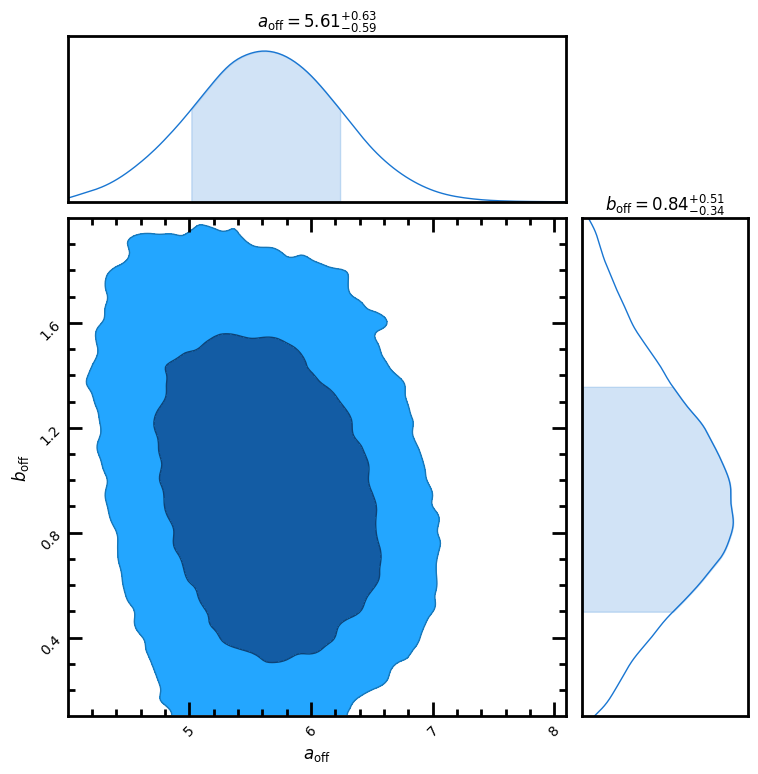

In [69]:
data1 = samples1.numpy()
c = ChainConsumer()
c.add_chain(data1, parameters=[r"$a_{\rm off}$", r"$b_{\rm off}$"])
fig = c.plotter.plot(figsize="column", truth=[0.0, 4.0])

# If we wanted to save to file, we would instead have written
# fig = c.plotter.plot(filename="location", figsize="column", truth=[0.0, 4.0])

# If we wanted to display the plot interactively...
# fig = c.plotter.plot(display=True, figsize="column", truth=[0.0, 4.0])

fig.set_size_inches(3 + fig.get_size_inches())  # Resize fig for doco. You don't need this.


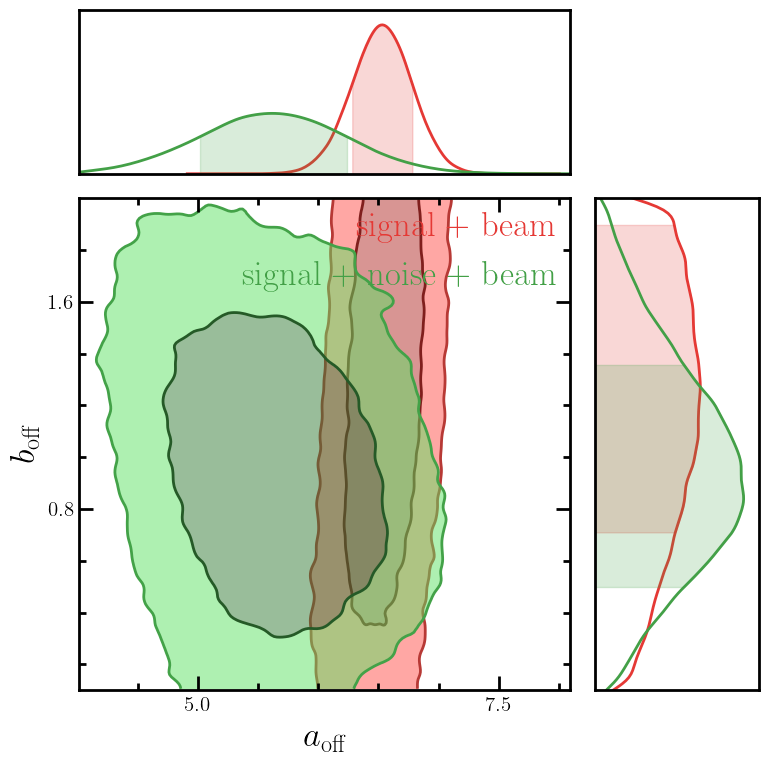

In [70]:
import numpy as np
from chainconsumer import ChainConsumer

colors=['red', 'green', '#FF0101', 'brown', 'magenta']
c = ChainConsumer()

c.add_chain(data, parameters=[r"$a_{\rm off}$", r"$b_{\rm off}$"], name = 'signal + beam')

c.add_chain(data1, parameters=[r"$a_{\rm off}$", r"$b_{\rm off}$"], name = 'signal + noise + beam')

c.configure(usetex=True, serif=True, diagonal_tick_labels=False, tick_font_size=15, label_font_size=25, max_ticks=2,
               colors=colors, shade=True, spacing=1.5, shade_alpha=[0.5,0.5,0.7,0.7],
            bar_shade=True, linewidths=[2.0, 2.0, 2.0, 2.0],
           legend_kwargs={"loc": "upper right", "fontsize": 25})

fig = c.plotter.plot(figsize=(7,7))
fig.set_size_inches(1+ fig.get_size_inches())

plt.savefig("contours_LIM.pdf")


In [81]:
x1 = simulator(torch.tensor([6.5, 0.99]), z =5.8).numpy()
x2 = simulator(torch.tensor([7.0, 0.99]), z =5.8).numpy()
x3 = simulator(torch.tensor([7.5, 0.99]
                           ), z =5.8).numpy()
x4 = simulator(torch.tensor([8.0, 0.99]), z =5.8).numpy()

6.5 0.99
7.0 0.99
7.5 0.99
8.0 0.99


In [88]:
len(bine)

40

In [91]:
x5 = simulator1(torch.tensor([6.5, 0.99]), z =5.8).numpy()

6.5 0.99
Adding noise


In [92]:
bine = np.linspace(-1, 1e1, num=100)
len(x1)

100

Text(0.5, 0, 'Intensity')

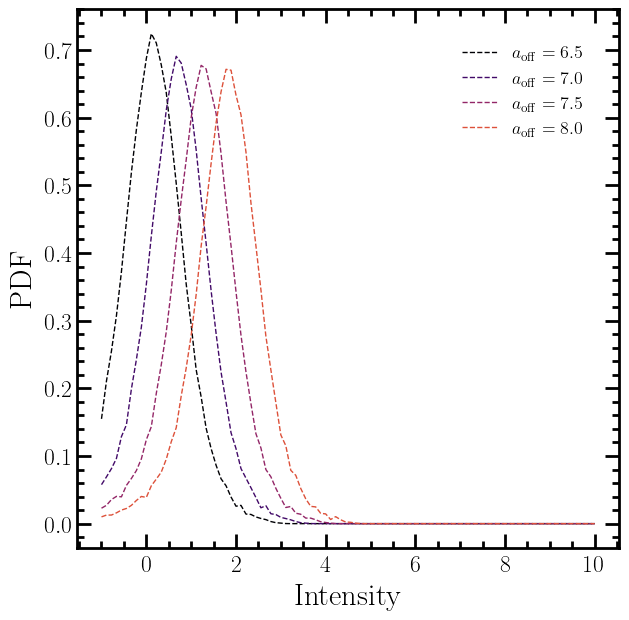

In [96]:
from limpy.plotsettings import *
plt.figure(figsize=[7,7], dpi=100)

xarray = [x1, x2, x3, x4]
xlabel = [r'$a_{\rm off}= 6.5$', r'$a_{\rm off}= 7.0$', r'$a_{\rm off}= 7.5$', r'$a_{\rm off}= 8.0$']
num_plots = 6

colormap = plt.cm.gist_ncar
plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.inferno(np.linspace(0, 1, num_plots))))


for i in range(len(xarray)):
    plt.plot(bine, xarray[i],linestyle='--', lw=1,label = xlabel[i])
    
#plt.plot(bine, x5,linestyle='-', lw=3, label = xlabel[i])
    
plt.legend(loc=0, frameon=False)

plt.ylabel("PDF")
plt.xlabel("Intensity")